# Bellabeat

This case study is focused on Bellabeat company. They procuse smart devices which track health data about their users. The data can help users to better understand their current habits and make healthy decisions.

We want to find insights in the habits of fitness track's users and apply it to the marketing strategy.

The question we want to answer is : **How are consummers using their smart devices ?**

To guide us in the analysis, we will follow this three questions :

- What are some trends in smart device usage ?
- How could these trends apply to Bellabeat customers ?
- How could these trends help influence Bellabeat marketing strategy ?

The dataset comes from https://www.kaggle.com/arashnic/fitbit **12.4.16-12.5.16** (European date format)

## Import all datasets

In [1]:
library(dplyr)
library(stringr)
library(tidyr)
library(ggplot2)
library(tidyverse)
library(reshape2)
install.packages("chron")
library(chron)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1     v purrr   0.3.2
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



package 'chron' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kesig\AppData\Local\Temp\RtmpwVjAO6\downloaded_packages


Warning message:
"package 'chron' was built under R version 3.6.3"

In [2]:
path = "Q:/Google Data Analytics/case study 2/"

daily.activity <- read.csv(paste(path, 'dailyActivity_merged.csv', sep=""), header=TRUE,stringsAsFactors = FALSE)
daily.calories <- read.csv(paste(path, 'dailyCalories_merged.csv', sep=""), header=TRUE,stringsAsFactors = FALSE)
daily.intensities <- read.csv(paste(path, 'dailyIntensities_merged.csv', sep=""), header=TRUE,stringsAsFactors = FALSE)
daily.steps <- read.csv(paste(path, 'dailySteps_merged.csv', sep=""), header=TRUE,stringsAsFactors = FALSE)
sleep.day <- read.csv(paste(path, 'sleepDay_merged.csv', sep=""), header=TRUE,stringsAsFactors = FALSE)

heartrate.seconds <- read.csv(paste(path, 'heartrate_seconds_merged.csv', sep=""), header=TRUE,stringsAsFactors = FALSE)


hourly.calories <- read.csv(paste(path, 'hourlyCalories_merged.csv', sep=""), header=TRUE,stringsAsFactors = FALSE)
hourly.intensities <- read.csv(paste(path, 'hourlyIntensities_merged.csv', sep=""), header=TRUE,stringsAsFactors = FALSE)
hourly.steps <- read.csv(paste(path, 'hourlySteps_merged.csv', sep=""), header=TRUE,stringsAsFactors = FALSE)

minute.calories.narrow <- read.csv(paste(path, 'minuteCaloriesNarrow_merged.csv', sep=""), header=TRUE,stringsAsFactors = FALSE)
minute.calories.wide <- read.csv(paste(path, 'minuteCaloriesWide_merged.csv', sep=""), header=TRUE,stringsAsFactors = FALSE)
minute.intensities.narrow <- read.csv(paste(path, 'minuteIntensitiesNarrow_merged.csv', sep=""), header=TRUE,stringsAsFactors = FALSE)
minute.intensities.Wide <- read.csv(paste(path, 'minuteIntensitiesWide_merged.csv', sep=""), header=TRUE,stringsAsFactors = FALSE)
minute.mets.narrow <- read.csv(paste(path, 'minuteMETsNarrow_merged.csv', sep=""), header=TRUE,stringsAsFactors = FALSE)
minute.Sleep <- read.csv(paste(path, 'minuteSleep_merged.csv', sep=""), header=TRUE,stringsAsFactors = FALSE)
minute.steps.narrow <- read.csv(paste(path, 'minuteStepsNarrow_merged.csv', sep=""), header=TRUE,stringsAsFactors = FALSE)
minute.steps.wide <- read.csv(paste(path, 'minuteStepsWide_merged.csv', sep=""), header=TRUE,stringsAsFactors = FALSE)
minute.steps.narrow <- read.csv(paste(path, 'minuteStepsNarrow_merged.csv', sep=""), header=TRUE,stringsAsFactors = FALSE)

weight.log <- read.csv(paste(path, 'weightLogInfo_merged.csv', sep=""), header=TRUE,stringsAsFactors = FALSE)

## Clean and join daily datasets

In [3]:
colnames(daily.activity)[2] <- 'ActivityDay' #activity

In [4]:
df <- daily.activity %>% full_join(daily.calories, by=c("Id","ActivityDay")) #calories
df <- df %>% full_join(daily.intensities, by=c("Id","ActivityDay")) # intensities
df <- df %>% full_join(daily.steps, by=c("Id","ActivityDay")) #steps

In [5]:
#sleep.day <- sleep.day %>%
#      mutate_at("SleepDay", str_replace, " 12:00:00 AM", "")
colnames(sleep.day)[2] <- "ActivityDay"
sleep.day$ActivityDay <- sapply(strsplit(sleep.day$ActivityDay, " "), "[", 1)

In [6]:
df <- df %>% full_join(sleep.day, by=c("Id","ActivityDay")) #sleep

In [7]:
colnames(weight.log)[2] <- "ActivityDay"
weight.log$ActivityDay <- sapply(strsplit(weight.log$ActivityDay, " "), "[", 1)
df <- df %>% full_join(weight.log, by=c("Id","ActivityDay")) #sleep

## Select only useful columns

In [8]:
df <- df[,c("Id",'ActivityDay','TotalSteps','TotalDistance','LoggedActivitiesDistance',
            'VeryActiveDistance.x','ModeratelyActiveDistance.x','LightActiveDistance.x','SedentaryActiveDistance.x',
            'VeryActiveMinutes.x', 'FairlyActiveMinutes.x' ,'LightlyActiveMinutes.x' ,'SedentaryMinutes.x' ,'Calories.x'
            ,'TotalMinutesAsleep',"TotalTimeInBed","WeightKg","WeightPounds","Fat","BMI","IsManualReport" )]


In [9]:
colnames(df) <- c("Id",'ActivityDay','TotalSteps','TotalDistance','LoggedActivitiesDistance',
            'VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance',
            'VeryActiveMinutes', 'FairlyActiveMinutes' ,'LightlyActiveMinutes' ,'SedentaryMinutes' ,'Calories'
            ,'TotalMinutesAsleep',"TotalTimeInBed","WeightKg","WeightPounds","Fat","BMI","IsManualReport" )

## Analyze

### Compute the percentage of data available per column

In [10]:
for(col in colnames(df)){
    print(paste(col,sum(!is.na(df[col]))/nrow(df[col])))
}

[1] "Id 1"
[1] "ActivityDay 1"
[1] "TotalSteps 1"
[1] "TotalDistance 1"
[1] "LoggedActivitiesDistance 1"
[1] "VeryActiveDistance 1"
[1] "ModeratelyActiveDistance 1"
[1] "LightActiveDistance 1"
[1] "SedentaryActiveDistance 1"
[1] "VeryActiveMinutes 1"
[1] "FairlyActiveMinutes 1"
[1] "LightlyActiveMinutes 1"
[1] "SedentaryMinutes 1"
[1] "Calories 1"
[1] "TotalMinutesAsleep 0.43796394485684"
[1] "TotalTimeInBed 0.43796394485684"
[1] "WeightKg 0.0710498409331919"
[1] "WeightPounds 0.0710498409331919"
[1] "Fat 0.00212089077412513"
[1] "BMI 0.0710498409331919"
[1] "IsManualReport 0.0710498409331919"


> This shows that `steps`, `distance` and `calories` are the mostly used functions on smartdevices

### Plot IsManualReport

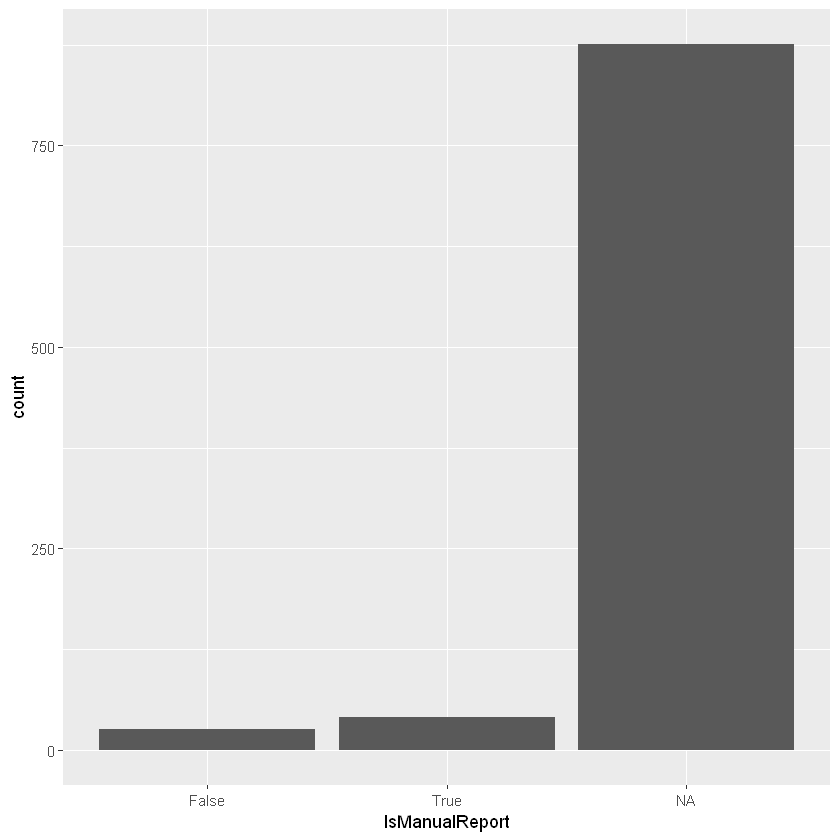

In [11]:
ggplot(df, aes(x=IsManualReport)) + geom_bar()

> `Weight`, `Fat` and `BMI` are not really used because because they can be either reported manually or not. In most of the case, they are not activated by default and users need to search for them. 

### On which days do people exercise the most ?

In [12]:
foo <- data.frame(do.call('rbind', strsplit(as.character(df$ActivityDay),'/',fixed=TRUE)))

In [13]:
foo <- foo[,c('X2' ,'X1', 'X3')]

In [14]:
foo['date'] <- paste(foo$X2,foo$X1,foo$X3,sep=".")

In [15]:
df$ActivityDay <- foo$date

In [16]:
df$weekday <- weekdays(as.Date(df$ActivityDay, format="%d.%m.%Y"))

In [17]:
means = df %>% group_by(weekday) %>% 
    summarise(mean_steps = mean(TotalSteps),
              mean_distance = mean(TotalDistance),
              mean_calories = mean(Calories),
              mean_VADistance = mean(VeryActiveDistance),
              mean_MADistance = mean(ModeratelyActiveDistance),
              mean_LADistance = mean(LightActiveDistance),
              mean_SADistance = mean(SedentaryActiveDistance))

In [18]:
means

weekday,mean_steps,mean_distance,mean_calories,mean_VADistance,mean_MADistance,mean_LADistance,mean_SADistance
dimanche,6933.231,5.027190,2263.000,1.488926,0.6180165,2.892314,0.000661157
jeudi,7420.682,5.326216,2204.297,1.385338,0.5130405,3.295338,0.002297297
lundi,7819.083,5.588347,2338.099,1.566364,0.5881818,3.367686,0.002561983
mardi,8125.007,5.832237,2356.013,1.613289,0.5930263,3.471053,0.001447368
mercredi,7559.373,5.488333,2302.620,1.633467,0.5270667,3.256333,0.001333333
samedi,8202.712,5.901040,2365.592,1.505440,0.6904000,3.660000,0.001040000
vendredi,7448.230,5.309921,2331.786,1.312937,0.4838095,3.489127,0.001825397


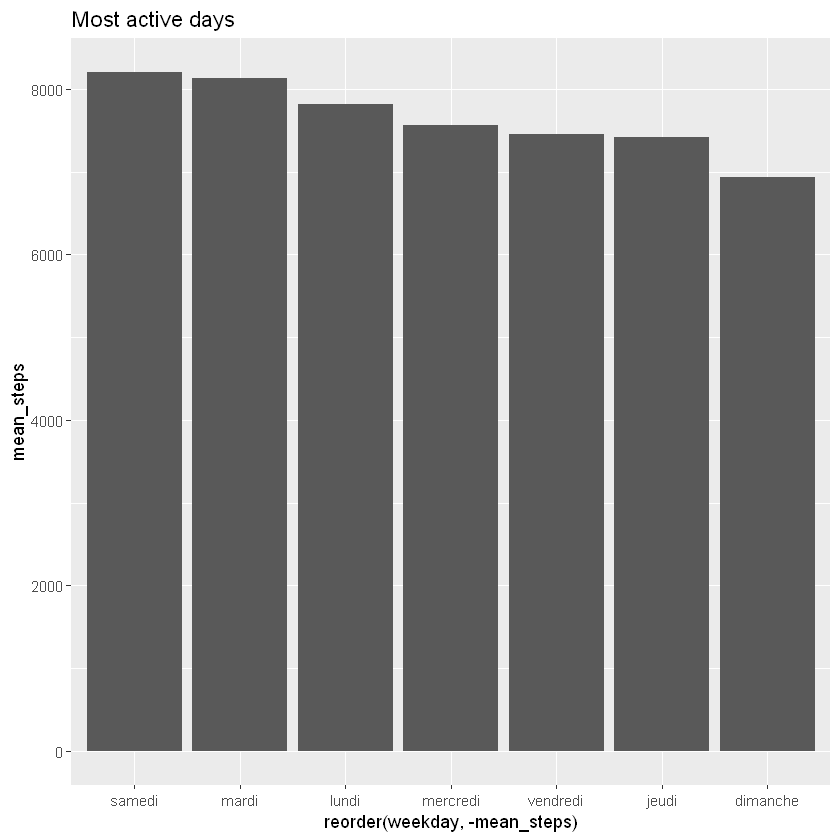

In [51]:
 ggplot(data=means, aes(x=reorder(weekday,-mean_steps),y=mean_steps)) + geom_bar(stat="identity") + ggtitle("Most active days")

### What type of distance ?

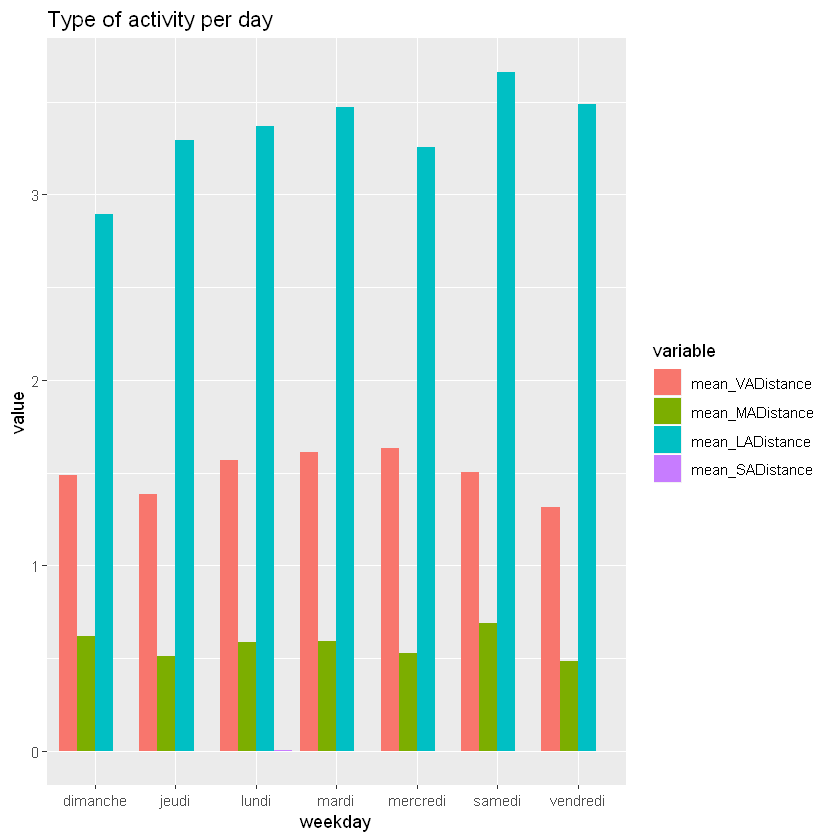

In [49]:
means.long <- melt(means, id = "weekday", measure = c("mean_VADistance", "mean_MADistance", "mean_LADistance"
                                                       ,"mean_SADistance"))
ggplot(means.long, aes(weekday, value, fill= variable)) + geom_bar(stat="identity",position=position_dodge()) +
ggtitle("Type of activity per day")

The people are mostly `light active` which means that most of the users are not sportive.

In [21]:
means.by_date = df %>% group_by(ActivityDay) %>% 
    summarise(mean_steps = mean(TotalSteps),
              mean_distance = mean(TotalDistance),
              mean_calories = mean(Calories),
              mean_VADistance = mean(VeryActiveDistance),
              mean_MADistance = mean(ModeratelyActiveDistance),
              mean_LADistance = mean(LightActiveDistance),
              mean_SADistance = mean(SedentaryActiveDistance))

In [22]:
means.by_date$ActivityDay <- as.Date(means.by_date$ActivityDay,format="%d.%m.%y")

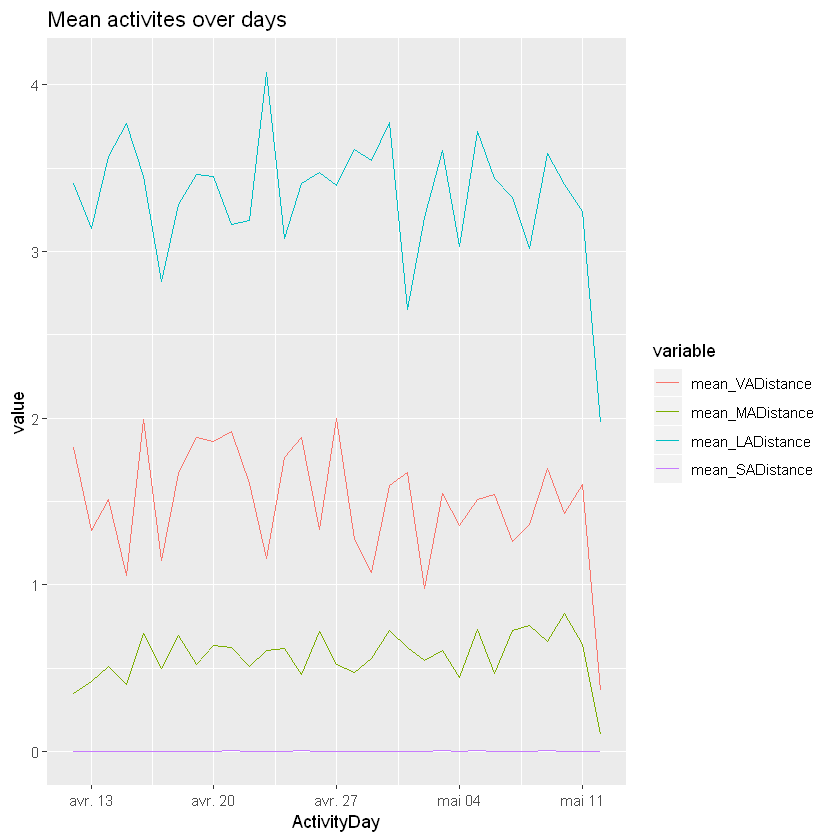

In [47]:
distance.by_date <- melt(means.by_date, id = "ActivityDay", measure = c("mean_VADistance", "mean_MADistance", "mean_LADistance"
                                                       ,"mean_SADistance"))
ggplot(distance.by_date, aes(ActivityDay, value, colour= variable)) + geom_line() + ggtitle("Mean activites over days")

In [54]:
colnames(df)

[1] "Id"                       "ActivityDay"             
 [3] "TotalSteps"               "TotalDistance"           
 [5] "LoggedActivitiesDistance" "VeryActiveDistance"      
 [7] "ModeratelyActiveDistance" "LightActiveDistance"     
 [9] "SedentaryActiveDistance"  "VeryActiveMinutes"       
[11] "FairlyActiveMinutes"      "LightlyActiveMinutes"    
[13] "SedentaryMinutes"         "Calories"                
[15] "TotalMinutesAsleep"       "TotalTimeInBed"          
[17] "WeightKg"                 "WeightPounds"            
[19] "Fat"                      "BMI"                     
[21] "IsManualReport"           "weekday"

### At what time do people mostly exercice ?

In [24]:
df.hourly <- hourly.calories %>% full_join(hourly.intensities, by=c("Id","ActivityHour"))
df.hourly <- df.hourly %>% full_join(hourly.steps, by=c("Id","ActivityHour"))

In [25]:
df.hourly$ActivityHour <- paste(sapply(strsplit(df.hourly$ActivityHour, " "), "[", 2),sapply(strsplit(df.hourly$ActivityHour, " "), "[", 3),sep = " ")


In [26]:
hourly.means <- df.hourly %>%
                group_by(ActivityHour) %>%
                summarize(mean_calories=mean(Calories),
                         mean_totalintensity=mean(TotalIntensity),
                         mean_averageIntensity=mean(AverageIntensity),
                         mean_TotalSteps=mean(StepTotal))

In [27]:
hourly.means$ActivityHour <- as.POSIXct(hourly.means$ActivityHour, format="%I:%M:%S %p",,tz=Sys.timezone())

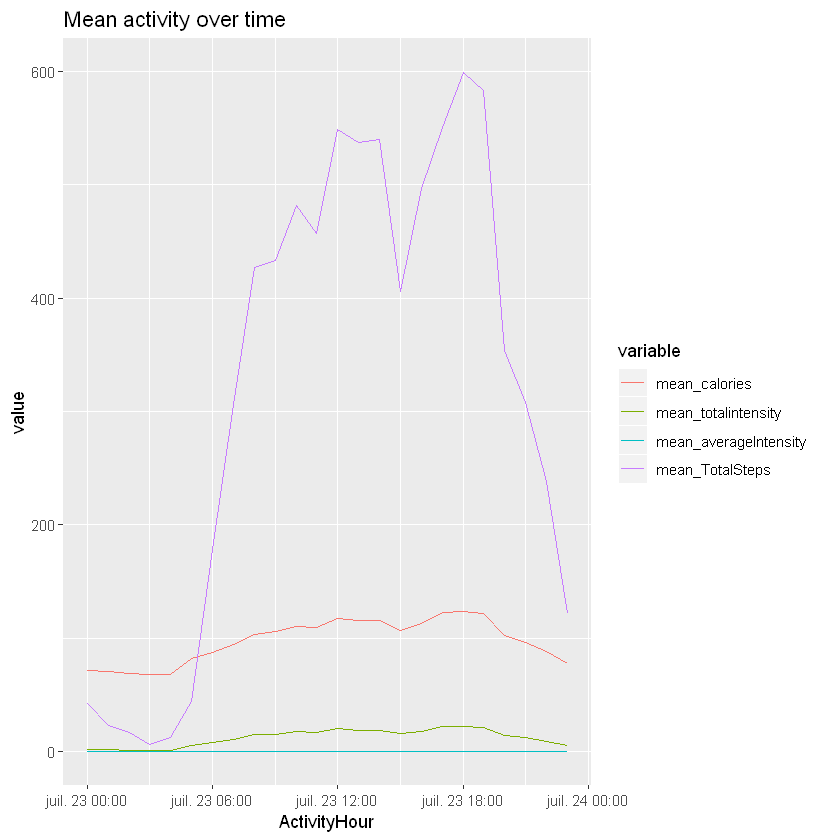

In [45]:
distance.by_date <- melt(hourly.means, id = "ActivityHour", measure = c("mean_calories", "mean_totalintensity", 
                                                                        "mean_averageIntensity","mean_TotalSteps"))
ggplot(distance.by_date, aes(ActivityHour, value, colour= variable)) + geom_line() + ggtitle("Mean activity over time")

> Steps increase between `5PM` and `7PM` which is related to end of work time.

In [62]:
activeminutes <- df[,c('ActivityDay','VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes')]

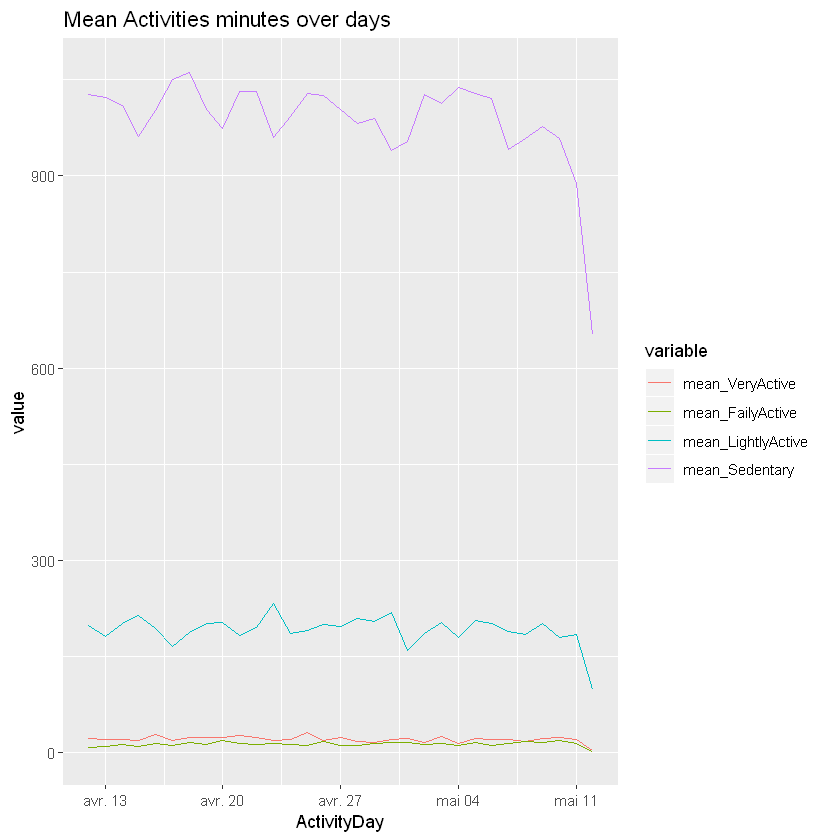

In [75]:
activity.means <- activeminutes %>%
                group_by(ActivityDay) %>%
                summarize(mean_VeryActive=mean(VeryActiveMinutes),
                         mean_FailyActive=mean(FairlyActiveMinutes),
                         mean_LightlyActive=mean(LightlyActiveMinutes),
                         mean_Sedentary=mean(SedentaryMinutes))
activities.minutes <- melt(activity.means, id = "ActivityDay", measure = c("mean_VeryActive", "mean_FailyActive",
                                                                  "mean_LightlyActive","mean_Sedentary"))

activities.minutes$ActivityDay <- as.Date(activities.minutes$ActivityDay,format="%d.%m.%y")
ggplot(activities.minutes, aes(ActivityDay, value, colour= variable)) + geom_line() + ggtitle("Mean Activities minutes over days")

### Is total calories related to sleepTime ?

In [36]:
calories_over_totalminutesasleep <- df[,c("Calories","TotalMinutesAsleep", "TotalTimeInBed")]

Warning message:
"Removed 530 rows containing missing values (geom_point)."

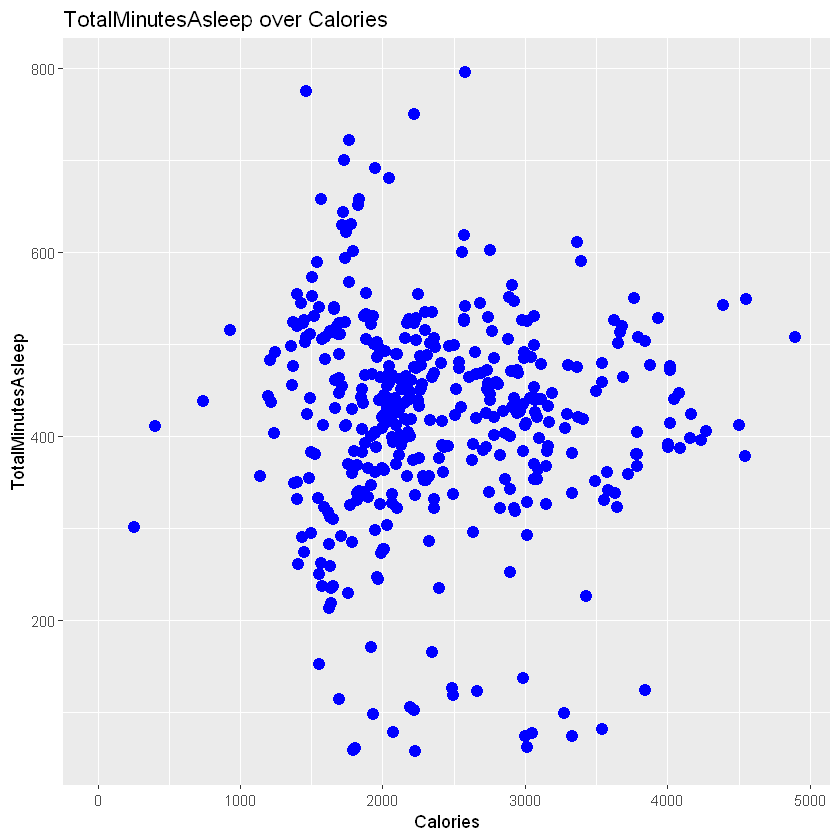

In [41]:
ggplot(data=calories_over_totalminutesasleep, aes(x=Calories,y=TotalMinutesAsleep)) + geom_point(color="blue", size=3) +
ggtitle("TotalMinutesAsleep over Calories")

Warning message:
"Removed 530 rows containing missing values (geom_point)."

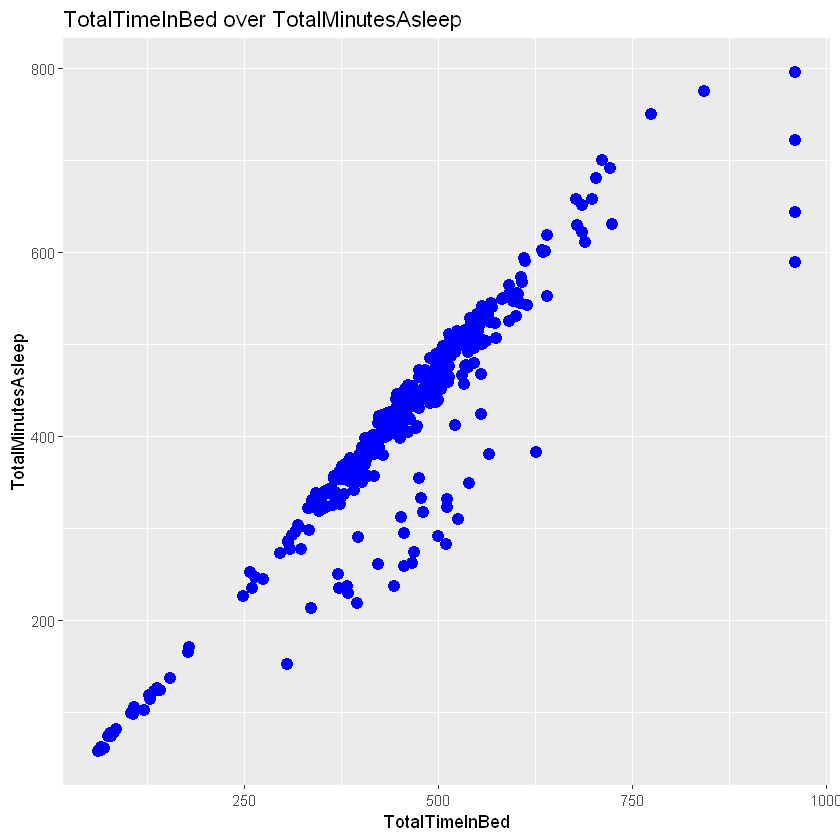

In [43]:
ggplot(data=calories_over_totalminutesasleep, aes(x=TotalTimeInBed,y=TotalMinutesAsleep)) + geom_point(color="blue", size=3) +
ggtitle("TotalTimeInBed over TotalMinutesAsleep")

# Summary

> Based on the graphics :
> - Most of the users are `sedentary` (more than `900 minutes` as day ~ `7hours` without sleeping time).
> - They mostly pratice light activities (like `walking`).
> - They mostly use basic functions (`calories`, `steps` and `distance`). Those are actived by default.
> - They are mostly active between `5PM` and `7PM` which is linked to the end of work time.
> - Most active days are `saturday` and `monday`.
> - **TotalMinutesAsleep** is somehow related to **calories** burned. Over `1500 calories` burned is enough to sleep well.
> - In most of the case, TotalTimeInBed are similar to TotalMinutesAsleep.
> - People sleep between `6 and 7 hours`.

# Act

Most of the users are sedentar which is really bad for the health (chance to develop diabetes, hypertension, heart illness and other diseases are really high).

- Bellbeat should focus his marketing strategy on the health part and implement, for example, distance or calories challenge to make people move.
- Most of sleeping time is focused between 6 and 7 hours which is not enough (lower bound of sleep time recommendation). Bellbeat should send notification to go to sleep based on the information collected (wake up time of the users).